In [1]:
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

In [14]:
AVHRR = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/AVHRR/0.05D/processed/stage_2/avhrr_timeseries_reprojected.zarr",
    consolidated=False
)

AVHRR = AVHRR["median"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

In [2]:
MODIS = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_2/modis_timeseries_reprojected.zarr",
    consolidated=False
)

MODIS = MODIS["median"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

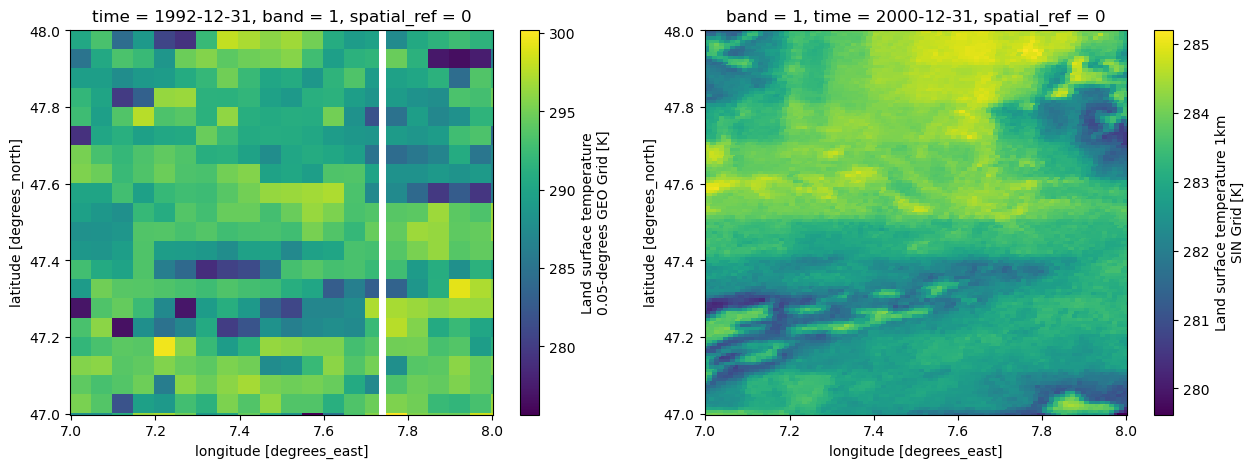

In [22]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))

AVHRR.isel(time=0).squeeze().plot.imshow(ax=ax[0])
MODIS.isel(time=0).squeeze().plot.imshow(ax=ax[1])